# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [105]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import datetime
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
os.chdir('/content/drive//My Drive/Colab Notebooks/LR-Delivery-Time')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [108]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [110]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [111]:
# Convert categorical features to category type
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [112]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
print(df['time_taken'])

0         47.0
1         44.0
2         55.0
3         59.0
4         46.0
          ... 
175772    43.0
175773    62.0
175774    46.0
175775    45.0
175776    37.0
Name: time_taken, Length: 175777, dtype: float64


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [113]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)


In [114]:
# Drop unnecessary columns
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  float64 
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken                175777 non-null  float64 
 13  hour                      175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [115]:
# Define target variable (y) and features (X)
y = df['time_taken']
X = df.drop('time_taken', axis=1)
y.info()
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 175777 entries, 0 to 175776
Series name: time_taken
Non-Null Count   Dtype  
--------------   -----  
175777 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  float64 
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null 

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [116]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
        market_id store_primary_category order_protocol  total_items  \
102712        2.0                     45            2.0            1   
94576         4.0                     20            3.0            1   
49784         1.0                     36            3.0            4   
37753         3.0                     39            1.0            2   
91728         2.0                      6            1.0            1   

        subtotal  num_distinct_items  min_item_price  max_item_price  \
102712       820                   1             745             745   
94576        995                   1             995             995   
49784       2040                   4             150             895   
37753       2376                   2             579            1399   
91728       1430                   1            1320            1320   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
102712                   35.0               

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [117]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['category']).columns.tolist()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 140621 non-null  float64 
 1   store_primary_category    140621 non-null  category
 2   order_protocol            140621 non-null  category
 3   total_items               140621 non-null  int64   
 4   subtotal                  140621 non-null  int64   
 5   num_distinct_items        140621 non-null  int64   
 6   min_item_price            140621 non-null  int64   
 7   max_item_price            140621 non-null  int64   
 8   total_onshift_dashers     140621 non-null  float64 
 9   total_busy_dashers        140621 non-null  float64 
 10  total_outstanding_orders  140621 non-null  float64 
 11  distance                  140621 non-null  float64 
 12  hour                      140621 non-null  int32   
 13  day_of_week               140

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

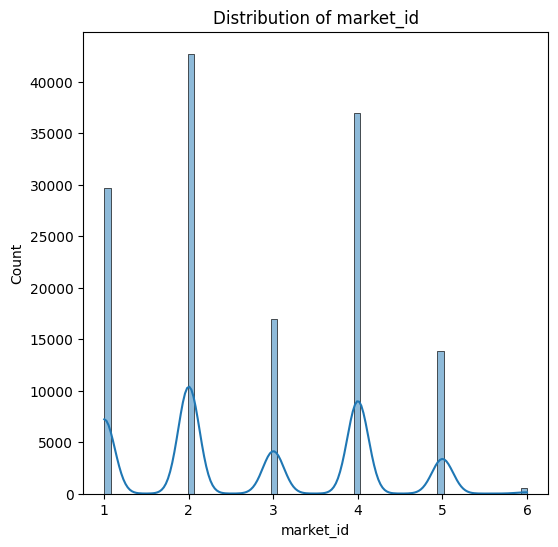

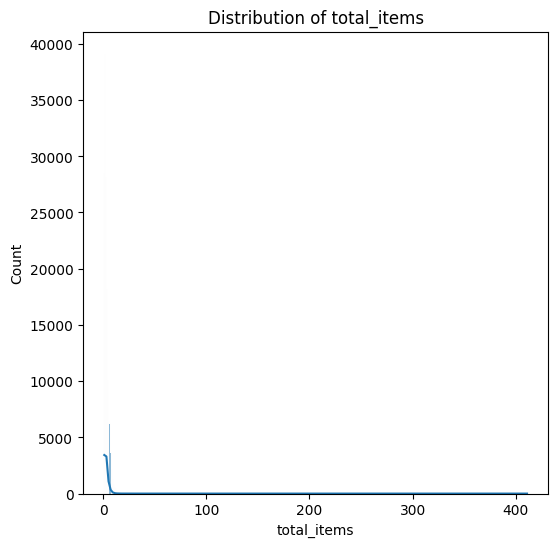

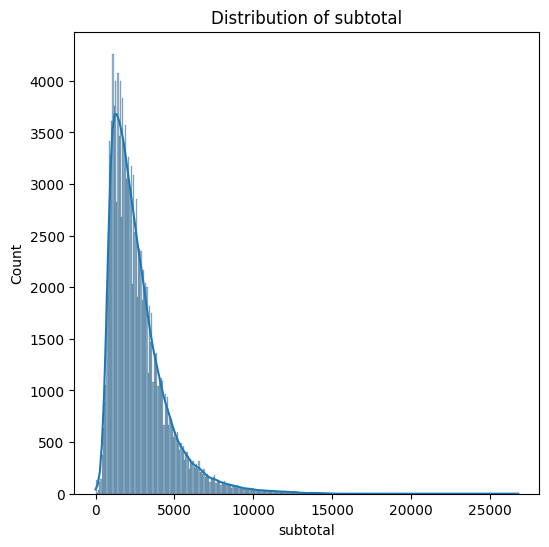

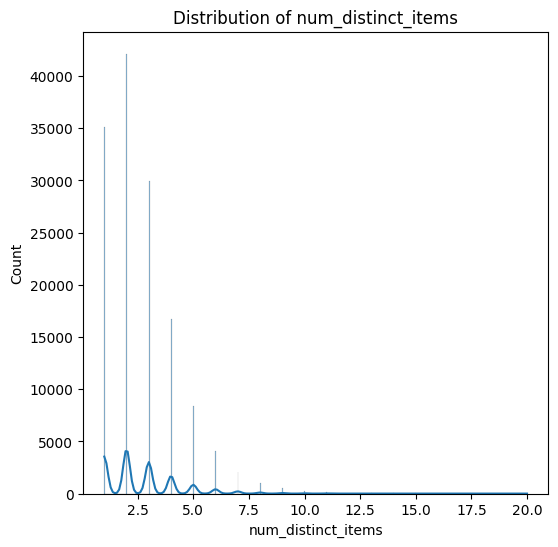

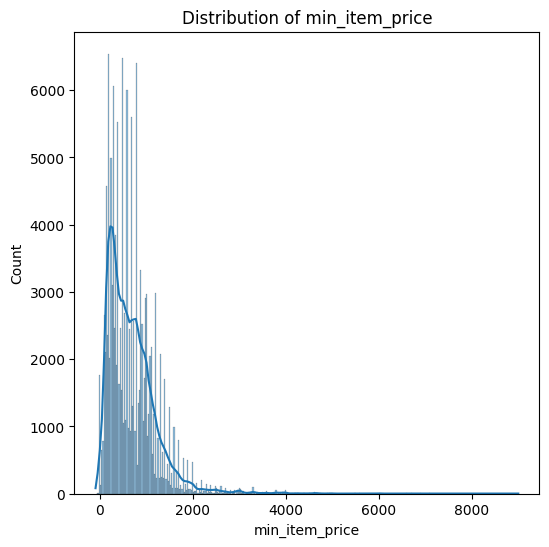

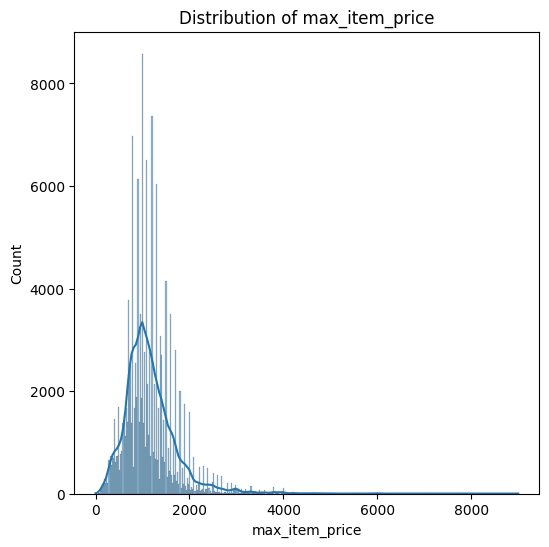

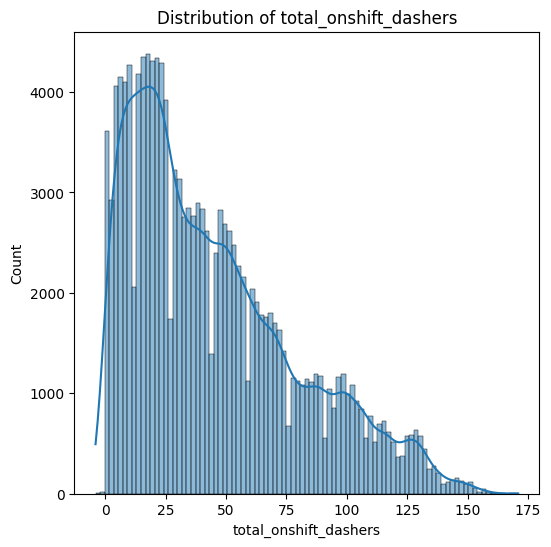

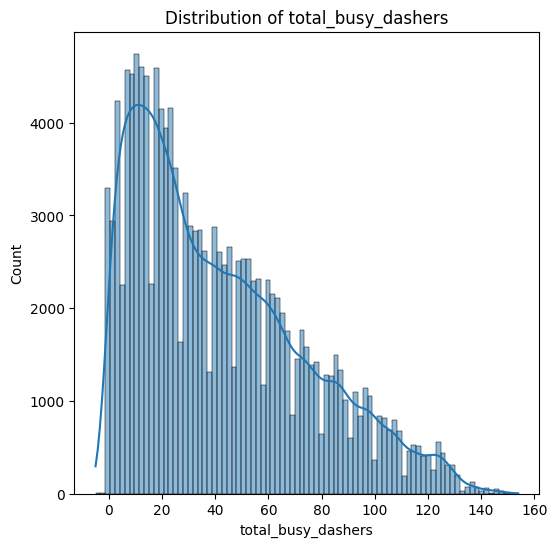

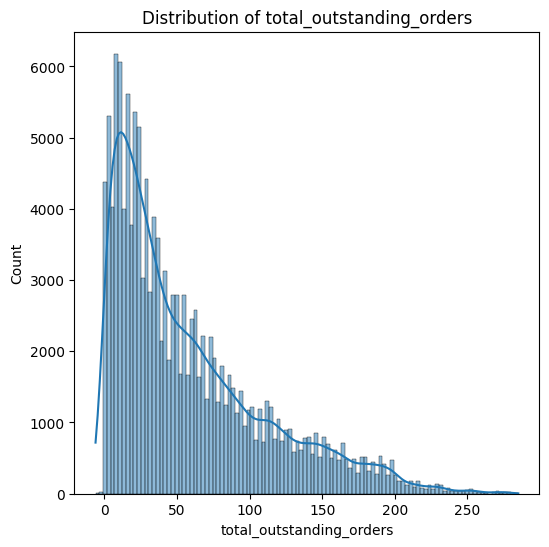

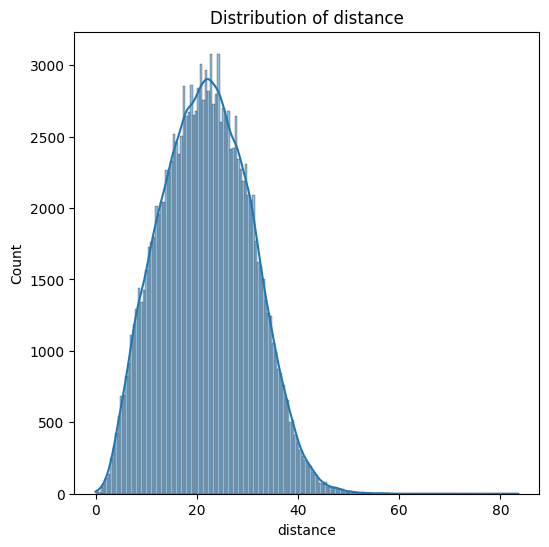

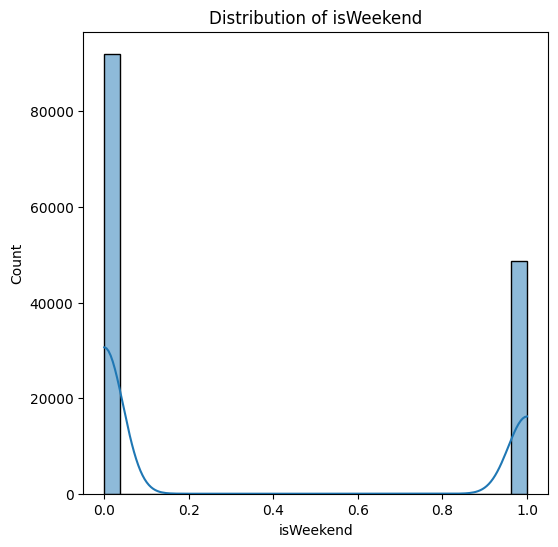

In [118]:
# Plot distributions for all numerical columns
for column in numerical_columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

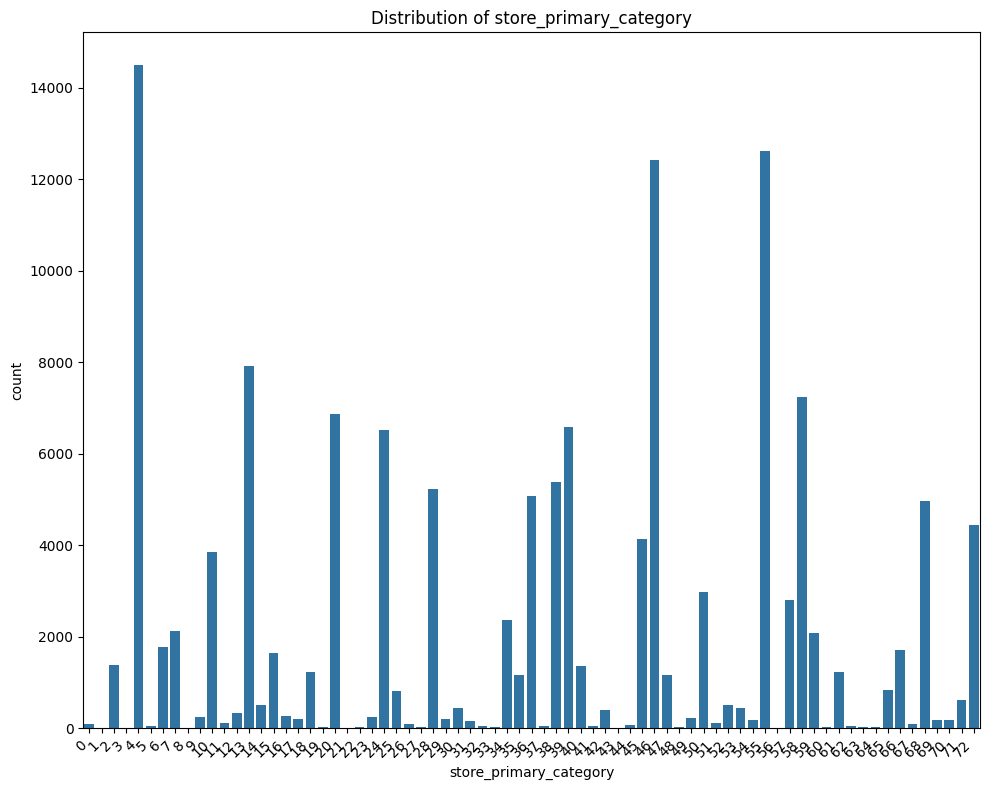

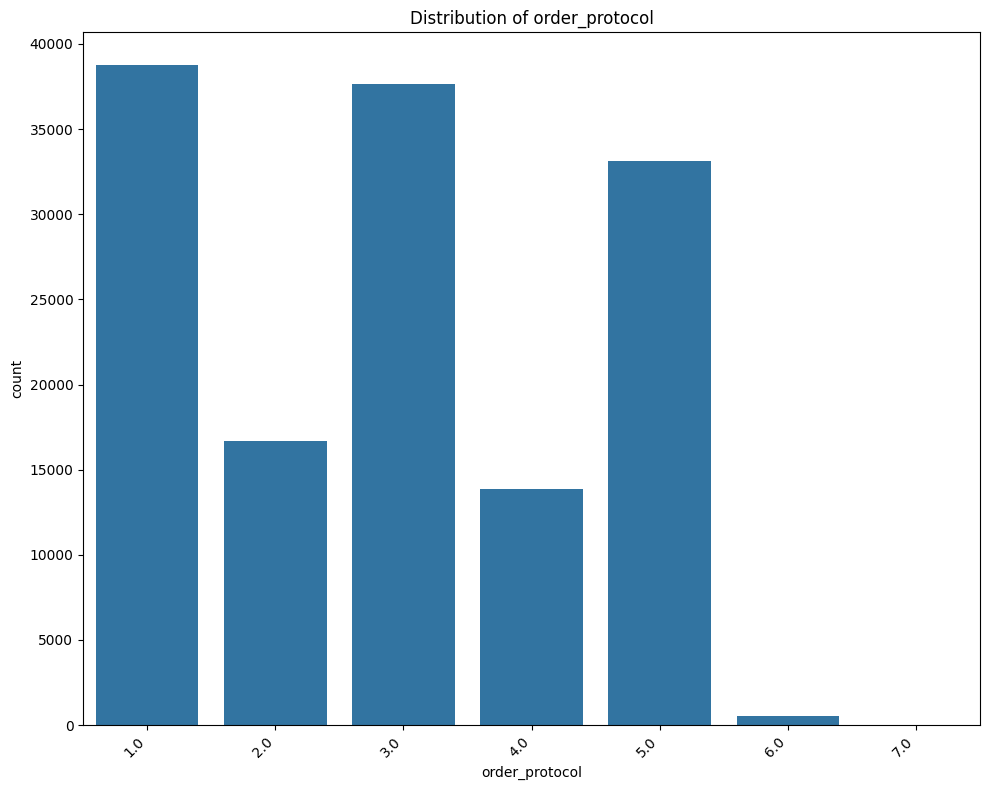

In [119]:
# Distribution of categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 8))
    sns.countplot(x=column, data=X_train)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

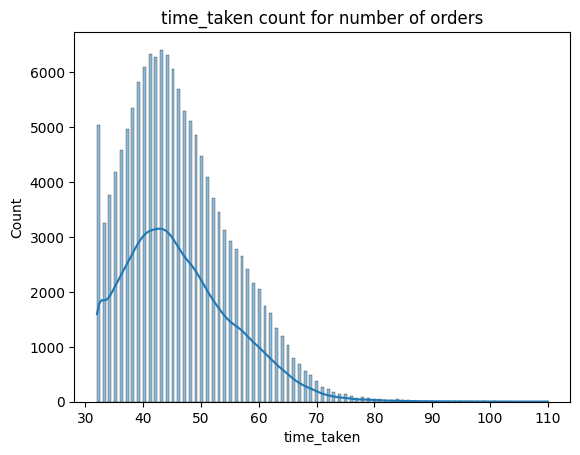

In [120]:
# Distribution of time_taken
sns.histplot(y_train, kde=True)
plt.title('time_taken count for number of orders')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

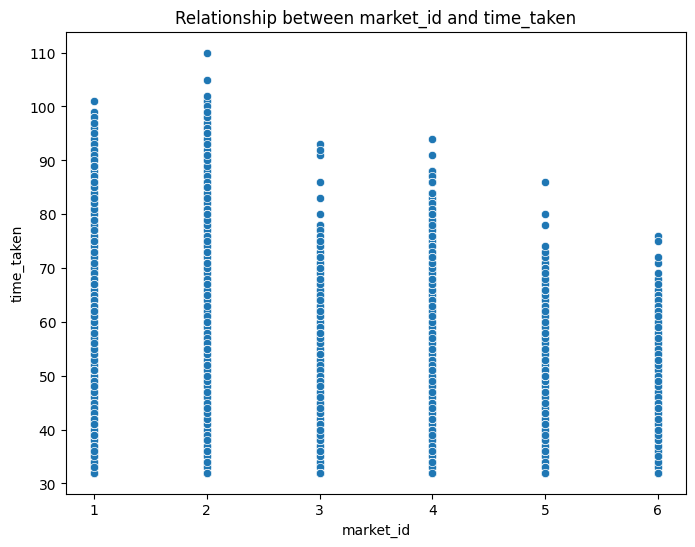

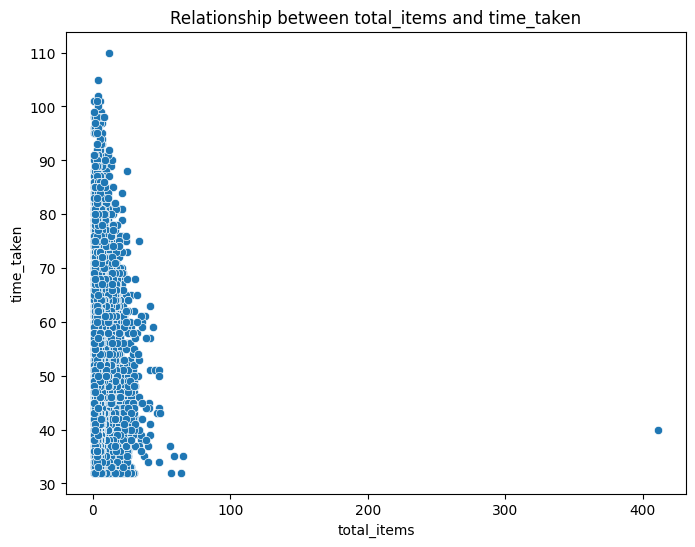

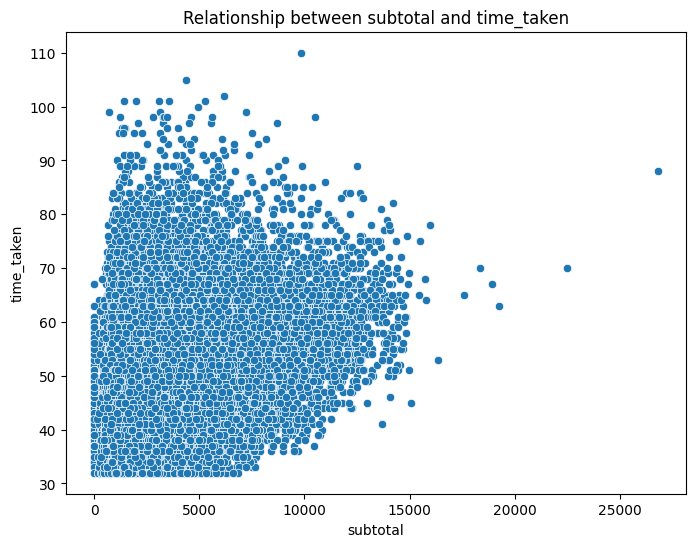

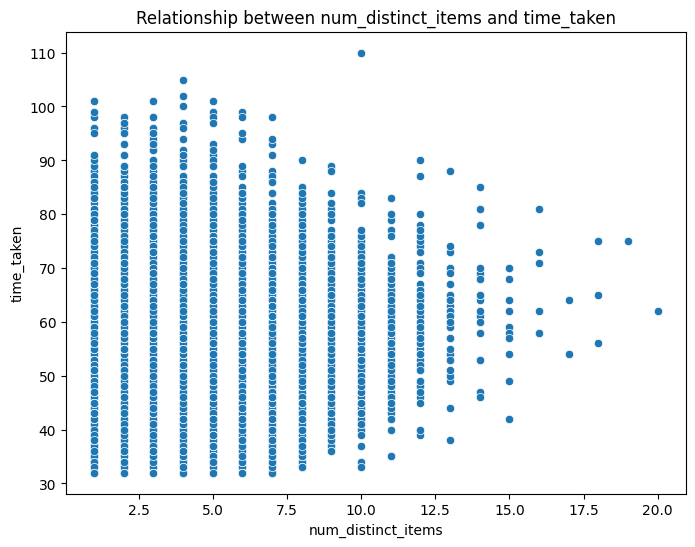

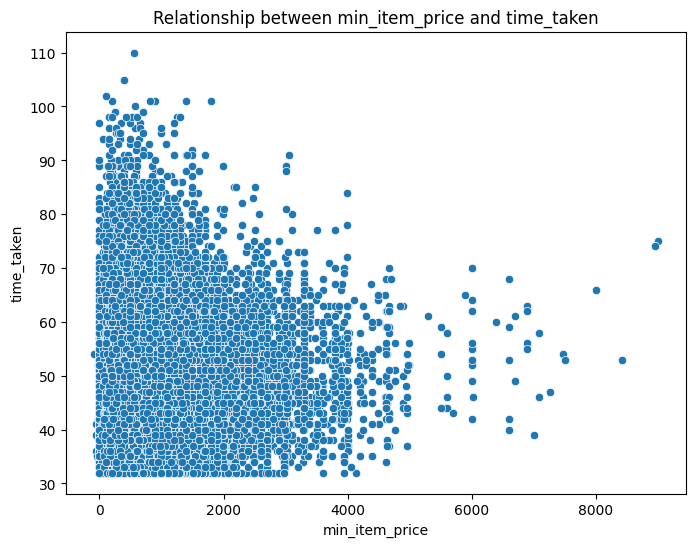

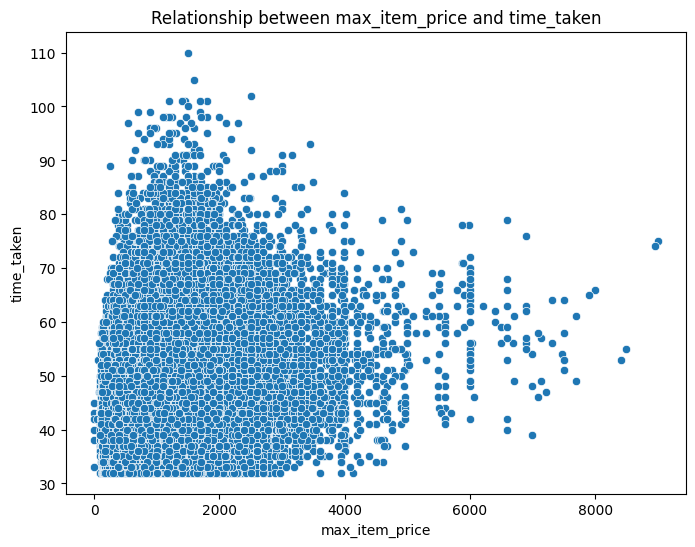

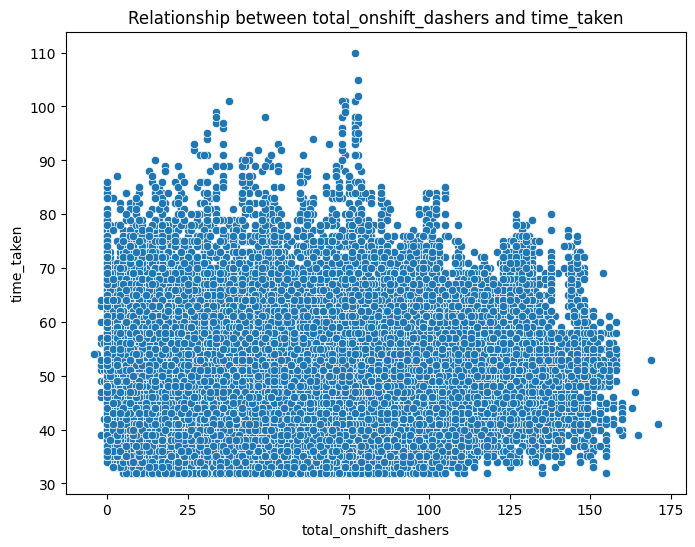

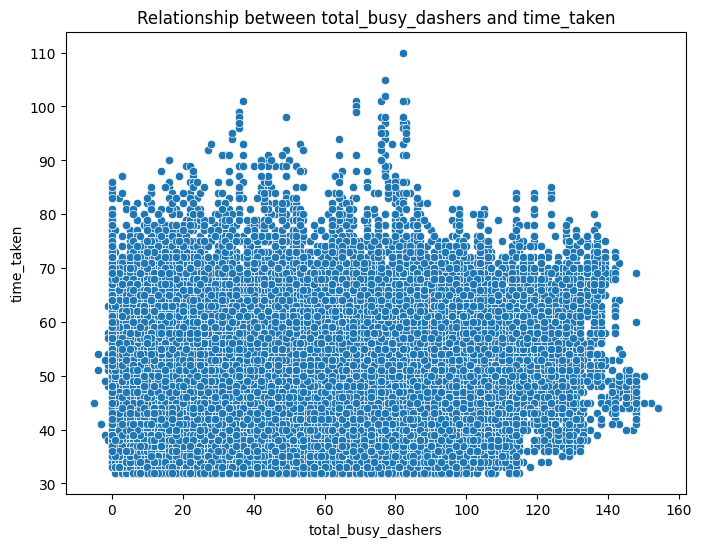

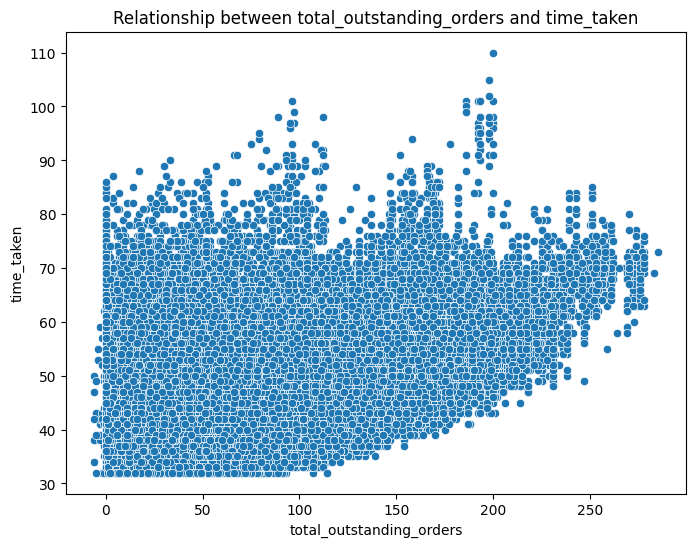

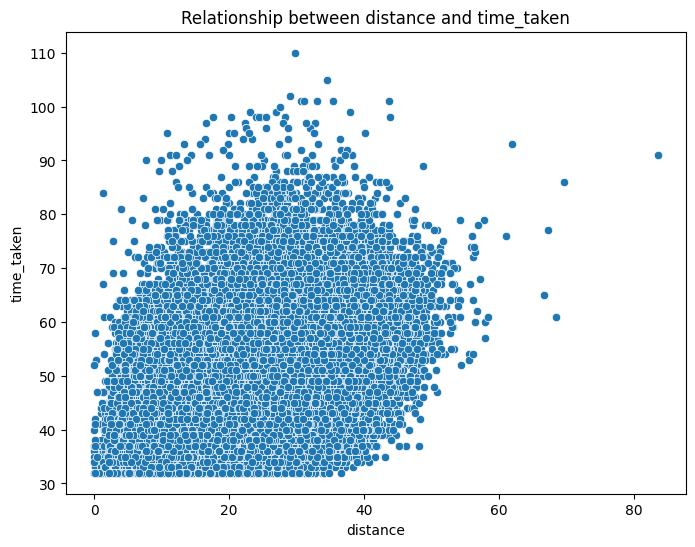

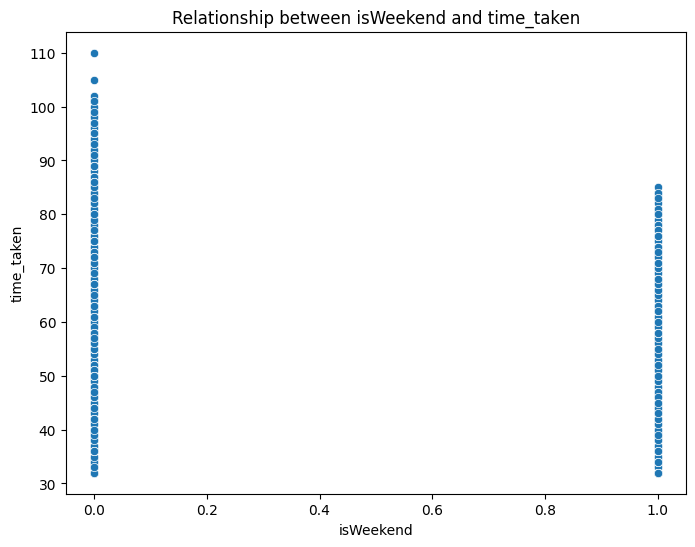

In [121]:
# Scatter plot to visualise the relationship between time_taken and other features
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train[column], y=y_train)
    plt.title(f'Relationship between {column} and time_taken')
    plt.show()

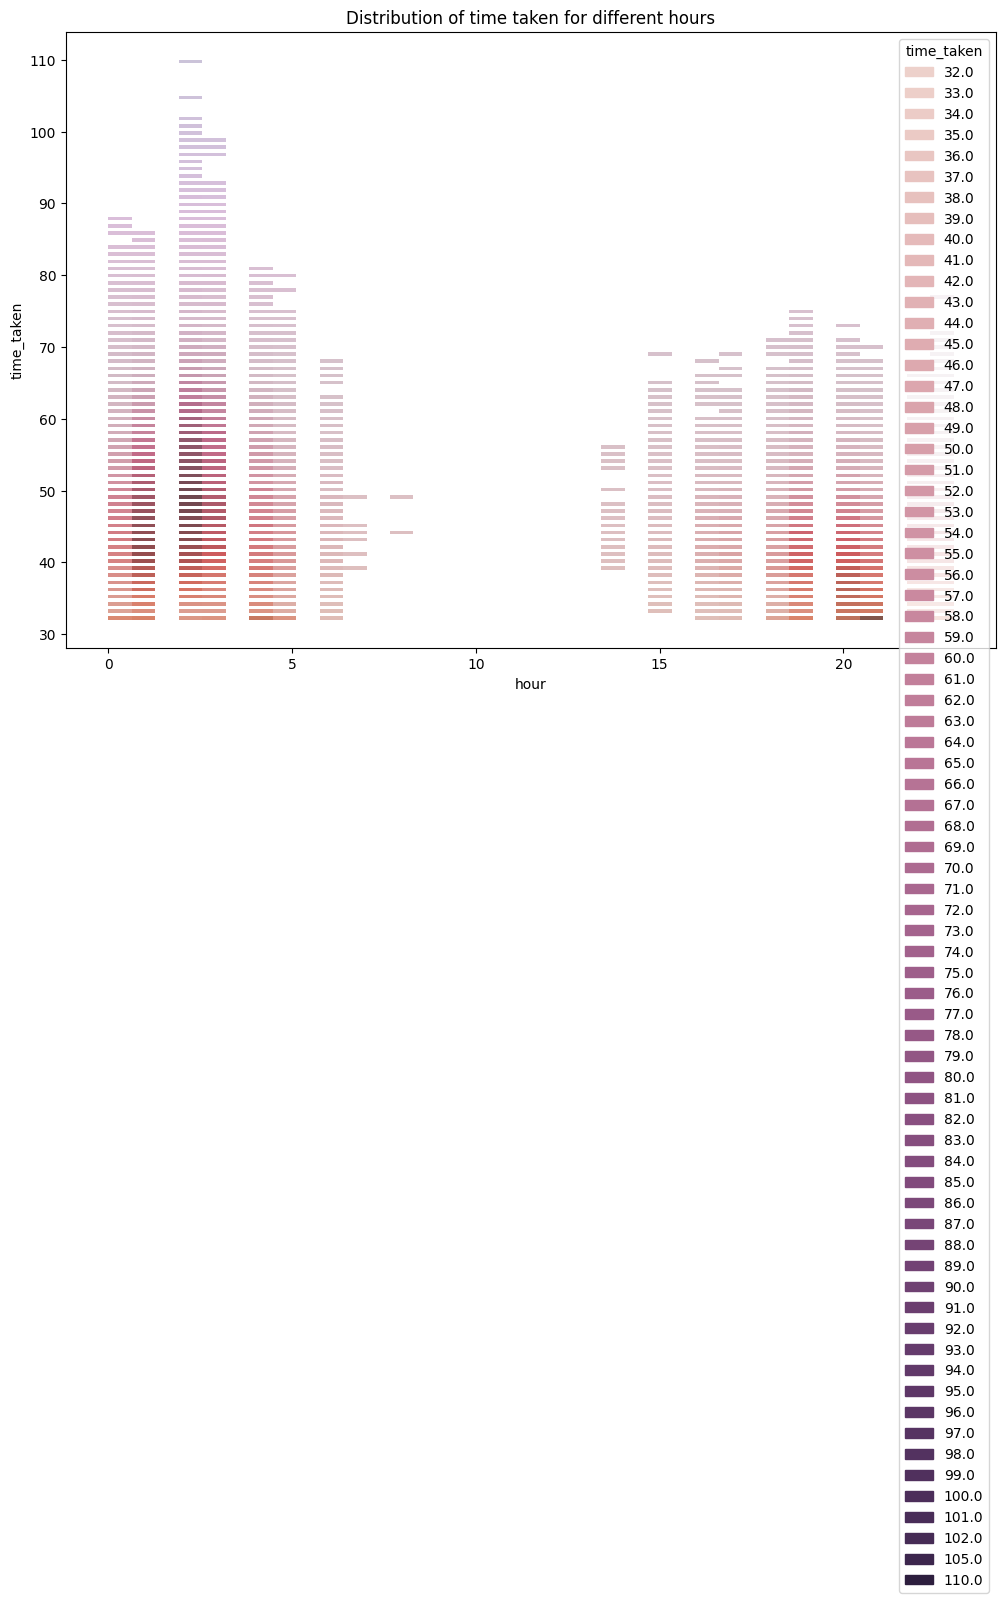

In [122]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 8))
sns.histplot(x=X_train['hour'], kde=True, y=y_train, hue=y_train, element='step')
plt.title('Distribution of time taken for different hours')
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

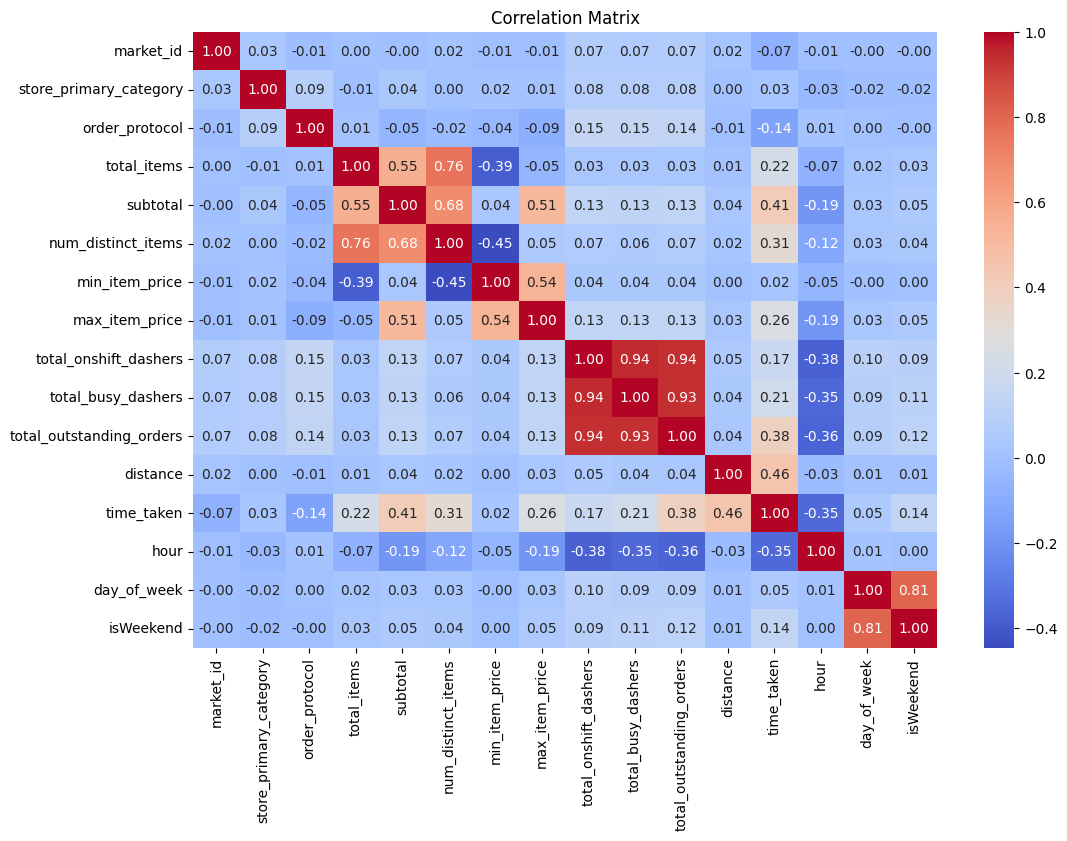

In [123]:
# Plot the heatmap of the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
# Good way to see the relationships between numerical features
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
# Darker reds indicate stronger positive correlations, darker blues indicate stronger negative correlations.

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [124]:
# Drop 3-5 weakly correlated columns from training dataset
correlations = df.corr()['time_taken']
threshold = 0.1
weakly_corr_columns = correlations[abs(correlations) < threshold].index.tolist()
print(weakly_corr_columns)
X_train.drop(weakly_corr_columns, axis=1, inplace=True)
X_train.info()

['market_id', 'store_primary_category', 'min_item_price', 'day_of_week']
<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 102712 to 121958
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   order_protocol            140621 non-null  category
 1   total_items               140621 non-null  int64   
 2   subtotal                  140621 non-null  int64   
 3   num_distinct_items        140621 non-null  int64   
 4   max_item_price            140621 non-null  int64   
 5   total_onshift_dashers     140621 non-null  float64 
 6   total_busy_dashers        140621 non-null  float64 
 7   total_outstanding_orders  140621 non-null  float64 
 8   distance                  140621 non-null  float64 
 9   hour                      140621 non-null  int32   
 10  isWeekend                 140621 non-null  int64   
dtypes: category(1), float64(4), int32(1), int64(5)
memory usage: 11.4 MB


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

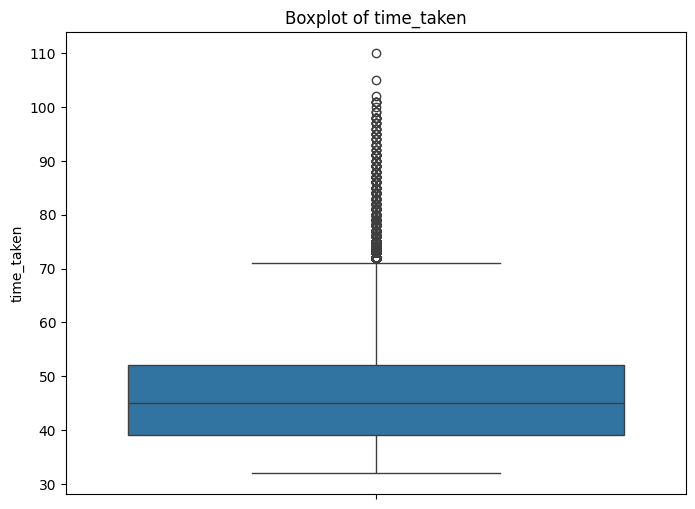

In [125]:
# Boxplot for time_taken
plt.figure(figsize=(8, 6))
sns.boxplot(y=y_train)
plt.title('Boxplot of time_taken')
plt.show()


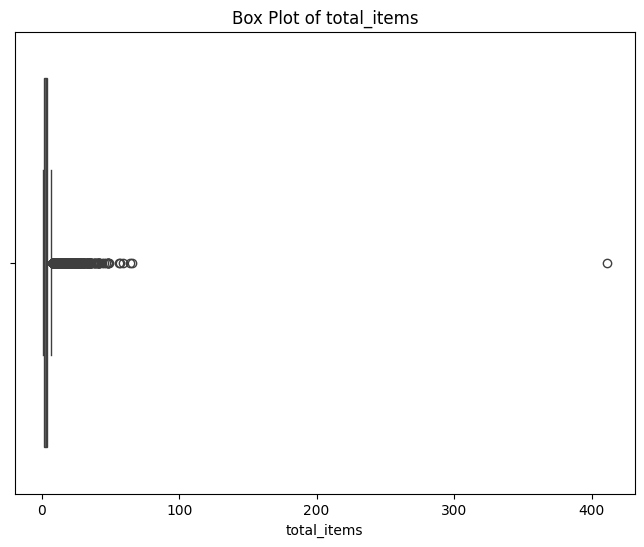

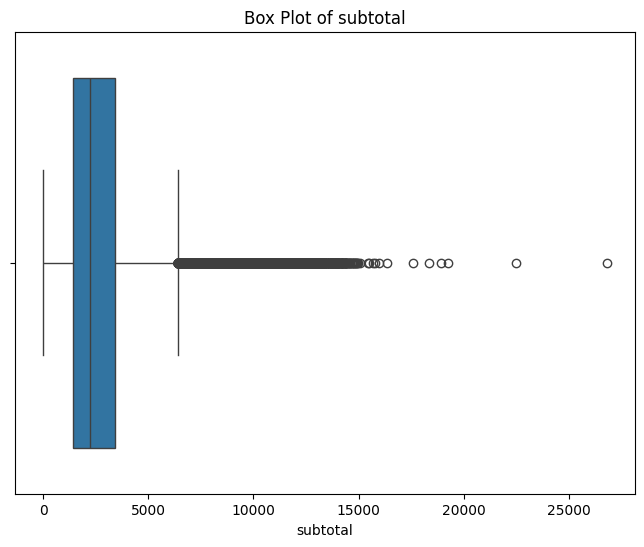

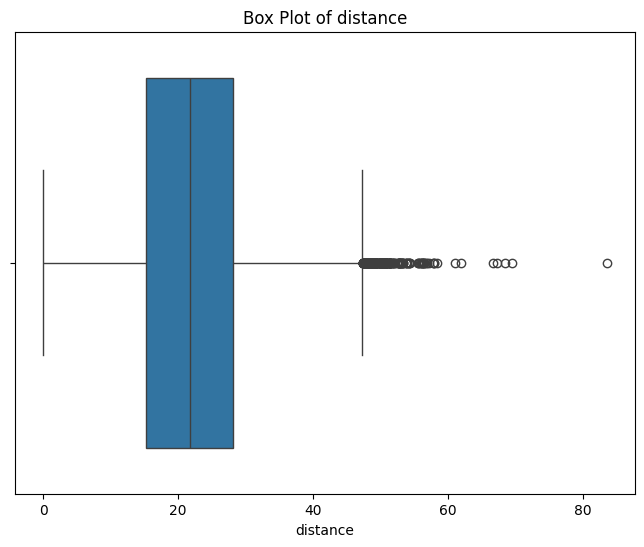

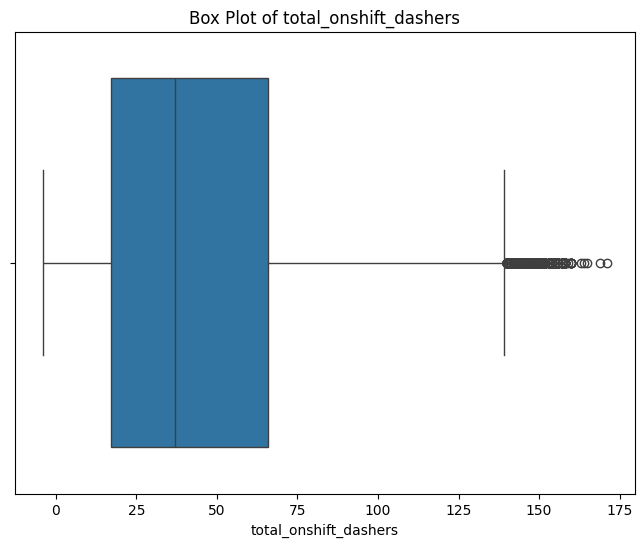

In [126]:
# Box plots for other numerical features
numerical_features = ['total_items', 'subtotal', 'distance', 'total_onshift_dashers']
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X_train[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [127]:
# Handle outliers
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[column].quantile(0.25) # 25th percentile
    Q3 = df[column].quantile(0.75) # 75th percentile
    IQR = Q3 - Q1 # difference between 1st and 3rd quartile
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f'Column: {column}')
    print(f'Lower bound: {lower_bound}')
    print(f'Upper bound: {upper_bound}')
    # Replaced outliers with upper/lower bound
    print(f'Shape before removing outliers: {df.shape}')
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f'Shape after removing outliers: {df.shape}')
    print(f'Outliers removed from {column}')
    print()

Column: market_id
Lower bound: -1.0
Upper bound: 7.0
Shape before removing outliers: (175777, 16)
Shape after removing outliers: (175777, 16)
Outliers removed from market_id

Column: total_items
Lower bound: -1.0
Upper bound: 7.0
Shape before removing outliers: (175777, 16)
Shape after removing outliers: (167291, 16)
Outliers removed from total_items

Column: subtotal
Lower bound: -1410.0
Upper bound: 6070.0
Shape before removing outliers: (167291, 16)
Shape after removing outliers: (161631, 16)
Outliers removed from subtotal

Column: num_distinct_items
Lower bound: -2.0
Upper bound: 6.0
Shape before removing outliers: (161631, 16)
Shape after removing outliers: (161036, 16)
Outliers removed from num_distinct_items

Column: min_item_price
Lower bound: -675.0
Upper bound: 1925.0
Shape before removing outliers: (161036, 16)
Shape after removing outliers: (157333, 16)
Outliers removed from min_item_price

Column: max_item_price
Lower bound: 10.0
Upper bound: 2114.0
Shape before removing o

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [128]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X_test.select_dtypes(include=['category']).columns.tolist()

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

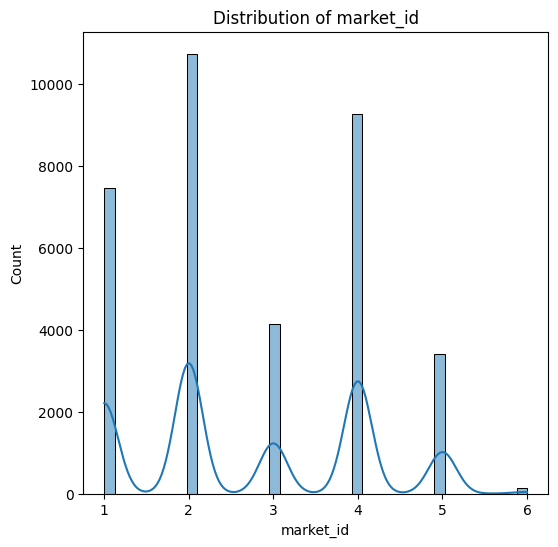

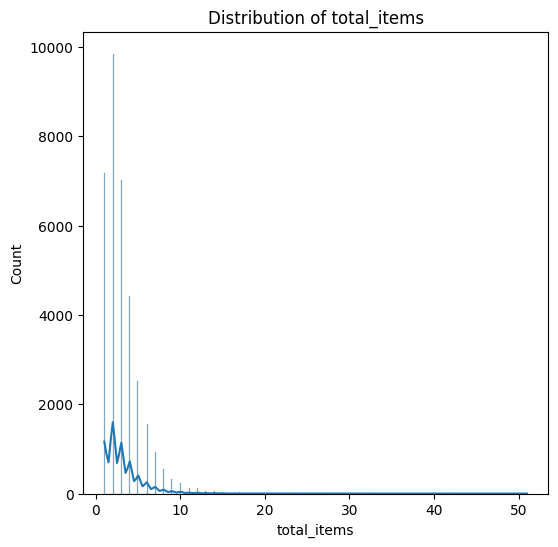

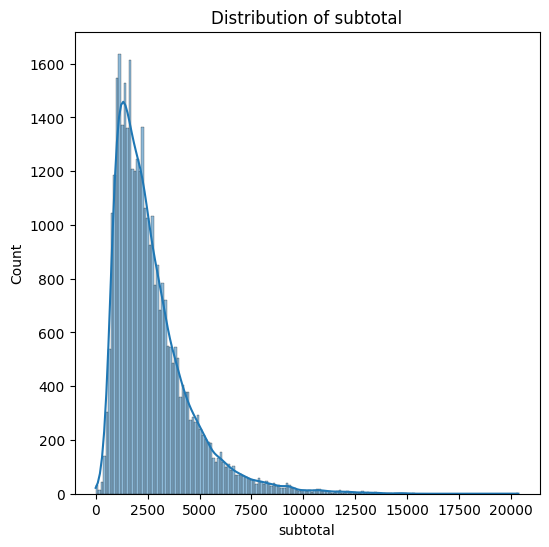

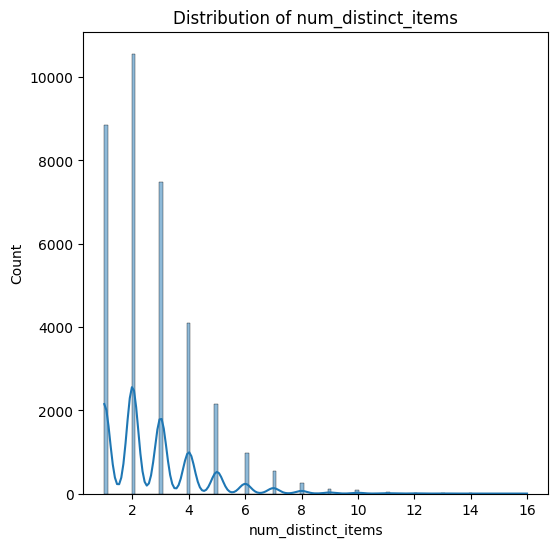

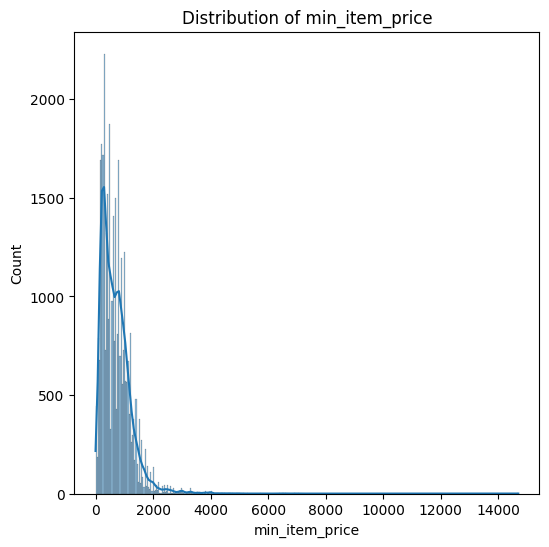

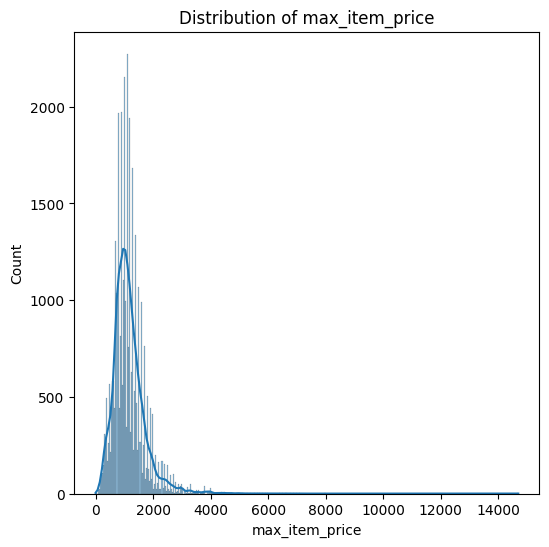

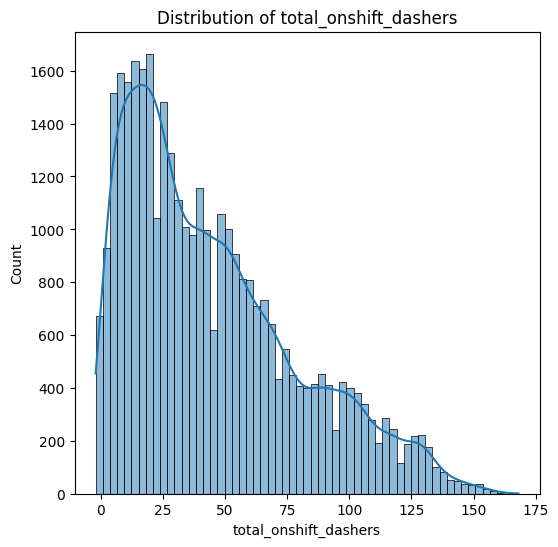

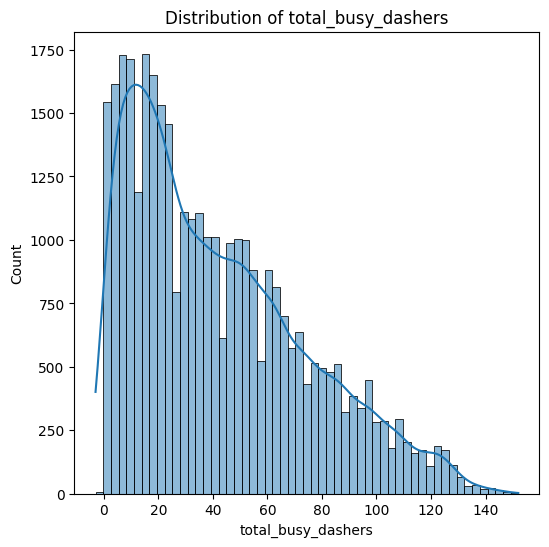

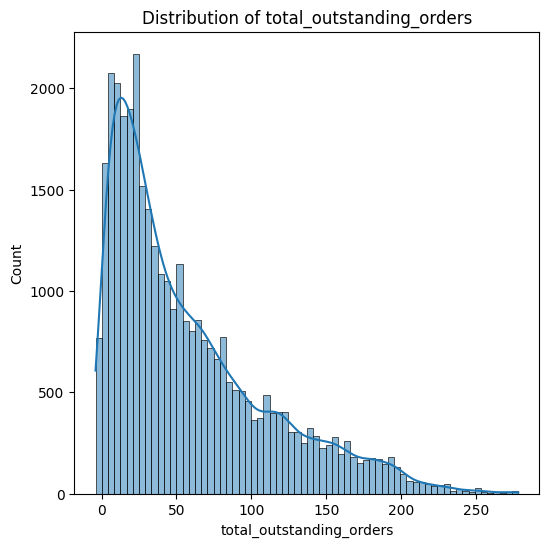

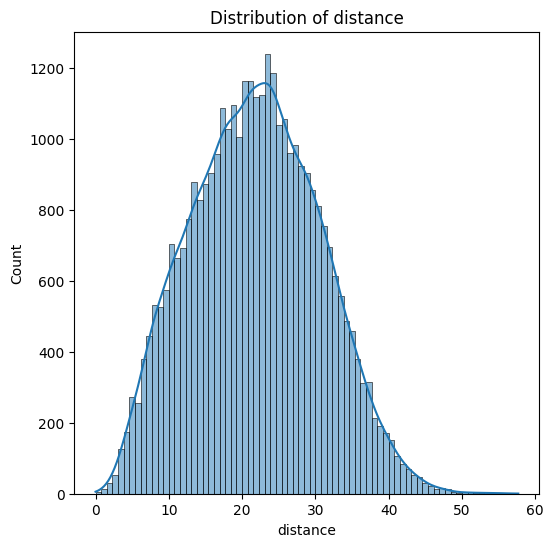

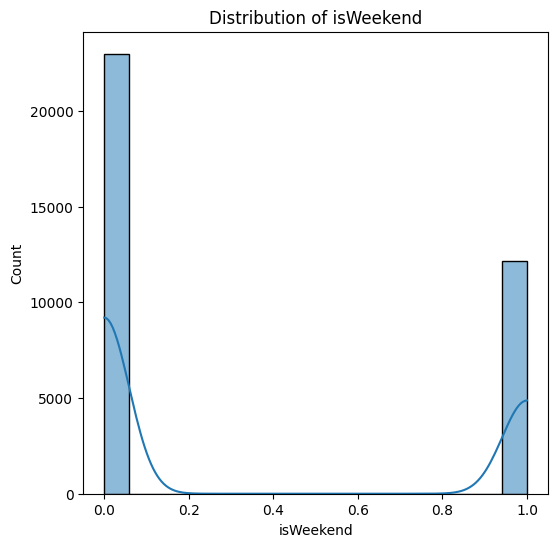

In [129]:
# Plot distributions for all numerical columns
for column in numerical_columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(X_test[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


##### **4.1.2**
Check the distribution of categorical features

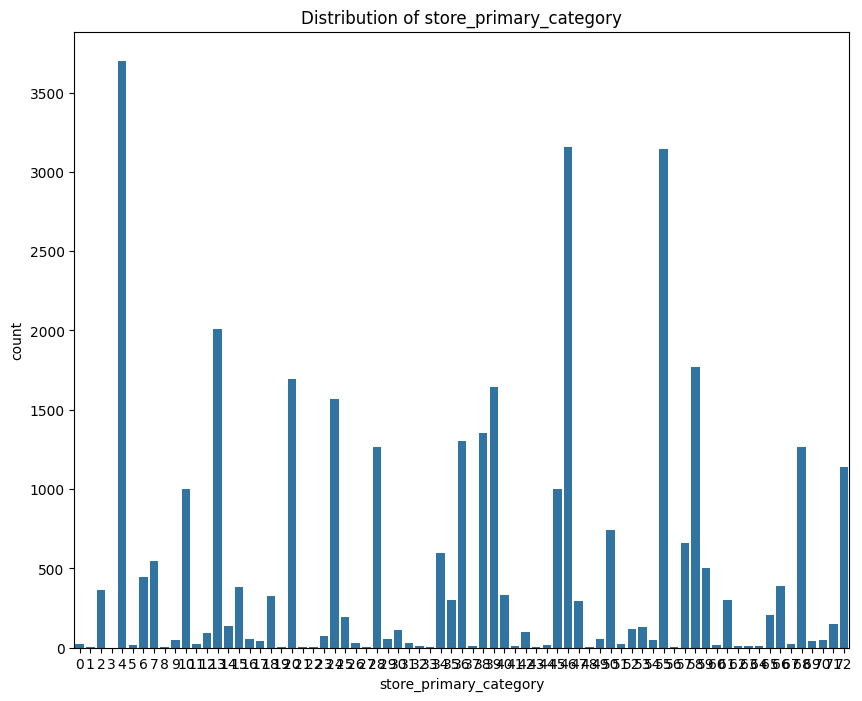

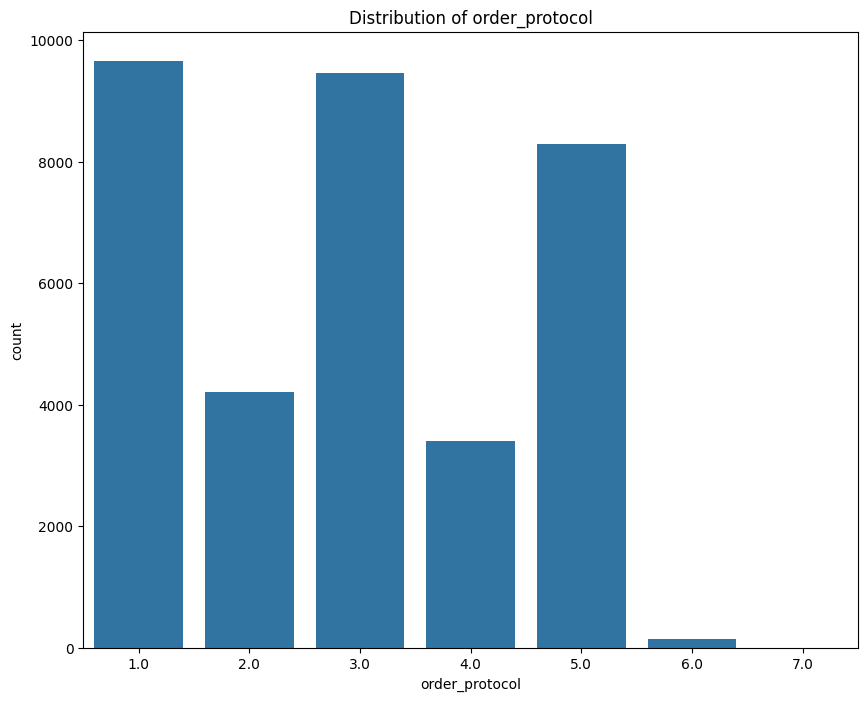

In [130]:
# Distribution of categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10, 8))
    sns.countplot(x=column, data=X_test)
    plt.title(f'Distribution of {column}')
    plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

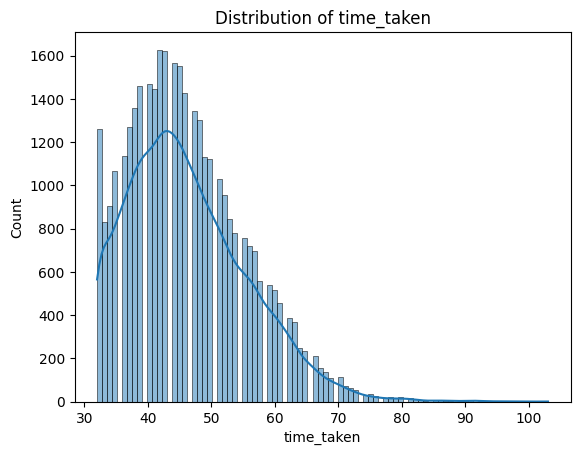

In [131]:
# Distribution of time_taken
sns.histplot(y_test, kde=True)
plt.title('Distribution of time_taken')
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

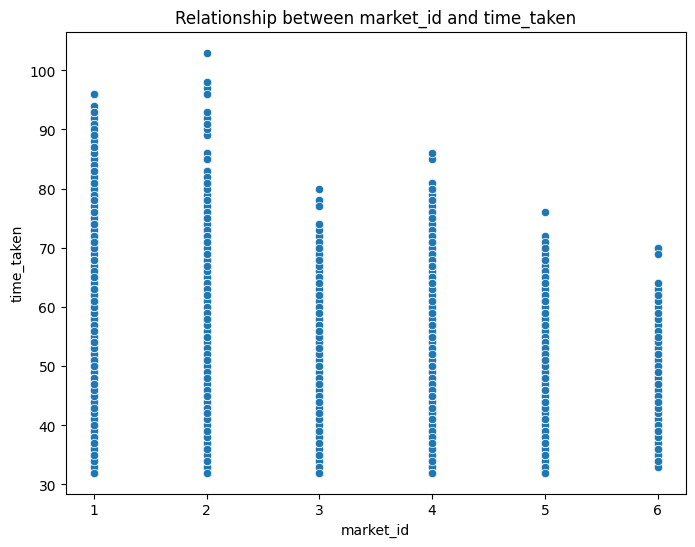

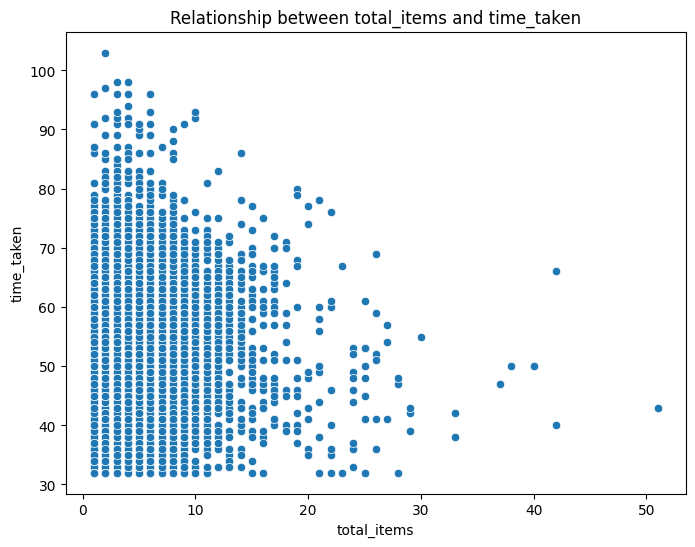

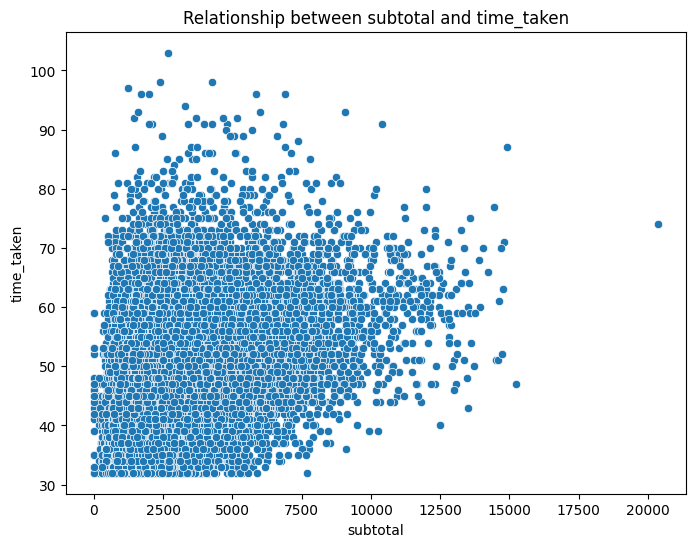

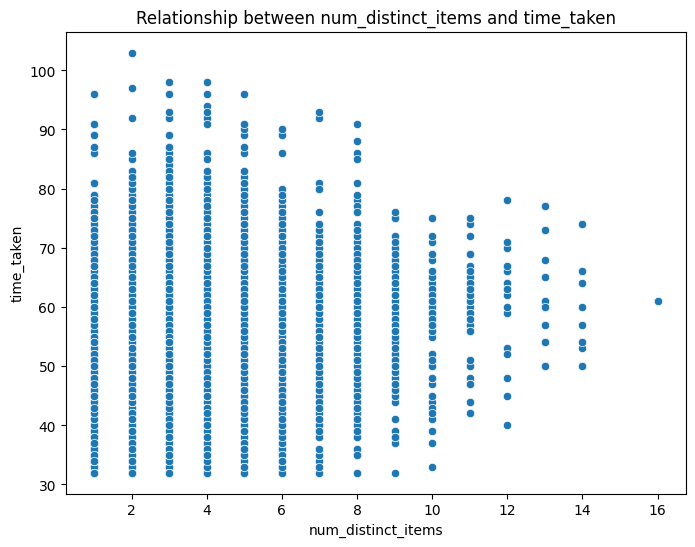

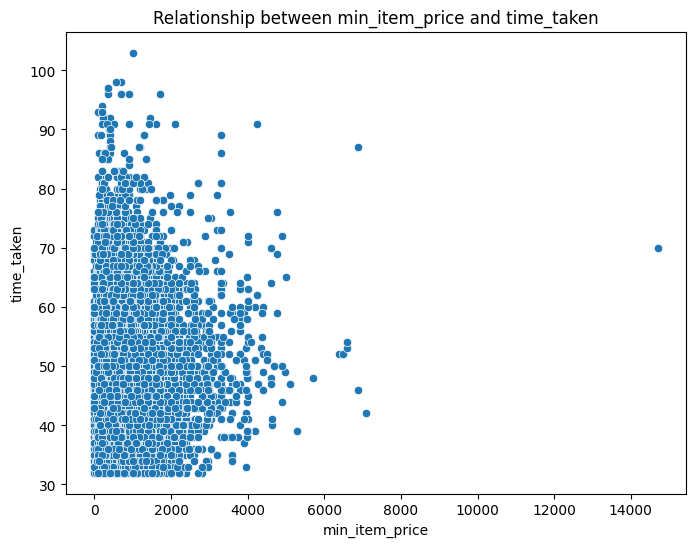

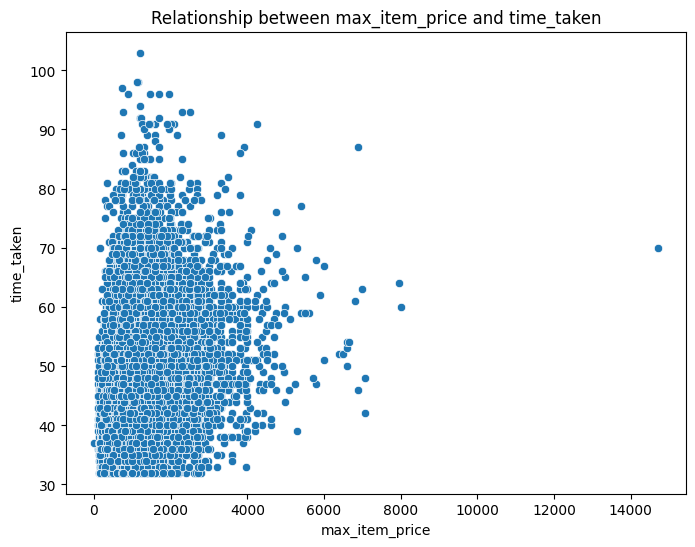

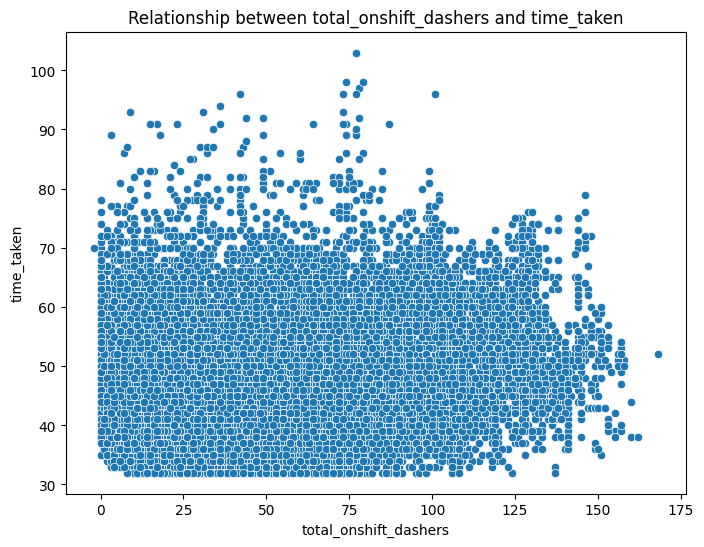

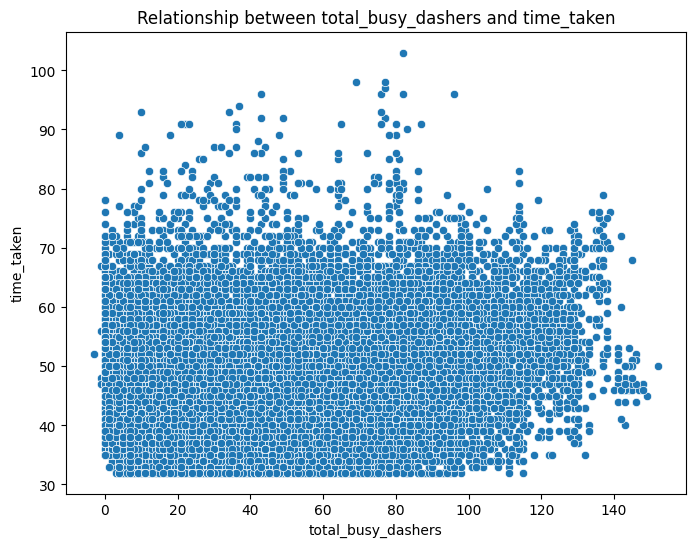

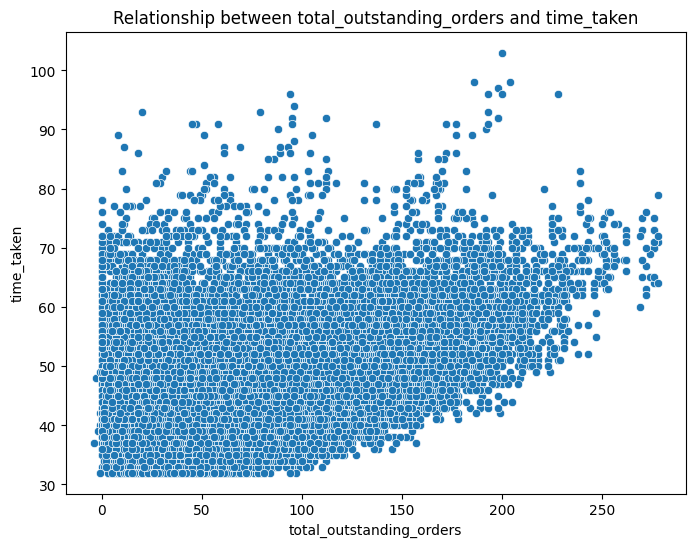

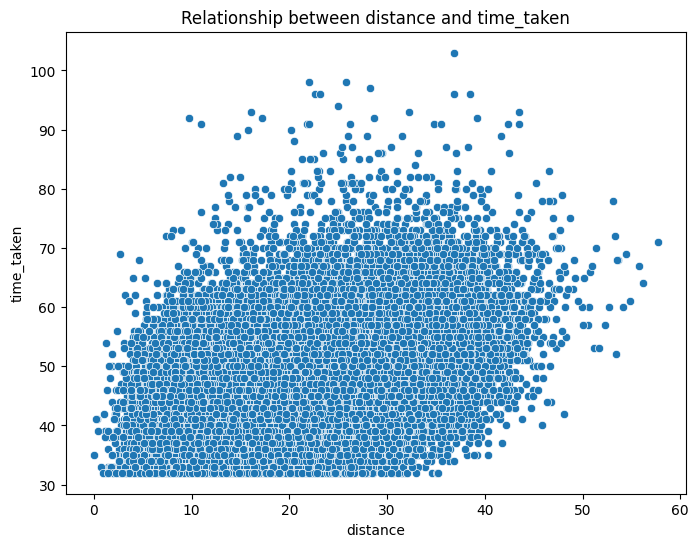

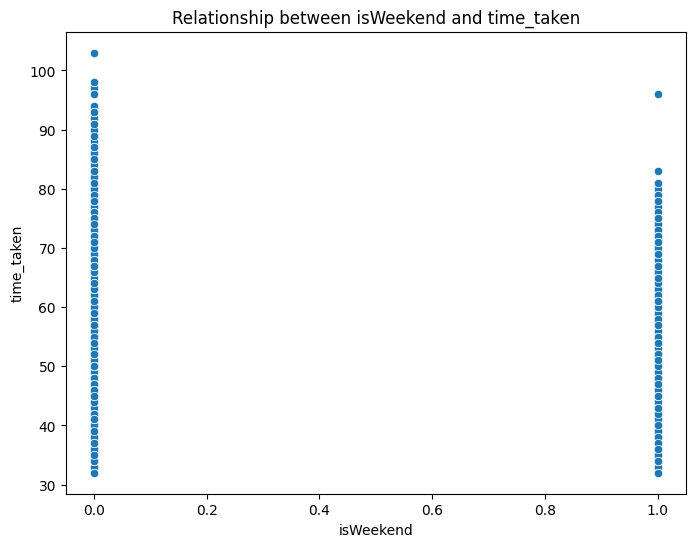

In [132]:
# Scatter plot to visualise the relationship between time_taken and other features
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test[column], y=y_test)
    plt.title(f'Relationship between {column} and time_taken')
    plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [133]:
# Drop the weakly correlated columns from training dataset
print(weakly_corr_columns)
X_test = X_test.drop(columns=weakly_corr_columns)
X_test.info()

['market_id', 'store_primary_category', 'min_item_price', 'day_of_week']
<class 'pandas.core.frame.DataFrame'>
Index: 35156 entries, 50609 to 49931
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   order_protocol            35156 non-null  category
 1   total_items               35156 non-null  int64   
 2   subtotal                  35156 non-null  int64   
 3   num_distinct_items        35156 non-null  int64   
 4   max_item_price            35156 non-null  int64   
 5   total_onshift_dashers     35156 non-null  float64 
 6   total_busy_dashers        35156 non-null  float64 
 7   total_outstanding_orders  35156 non-null  float64 
 8   distance                  35156 non-null  float64 
 9   hour                      35156 non-null  int32   
 10  isWeekend                 35156 non-null  int64   
dtypes: category(1), float64(4), int32(1), int64(5)
memory usage: 2.9 MB


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [134]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [135]:
# Apply scaling to the numerical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns_test = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns_test] = scaler.fit_transform(X_test[numerical_columns_test])



Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [136]:
# Create/Initialise the model
# Add a Constant Term: Linear regression models typically require a constant term (intercept).
# We need to add a column of ones to the feature matrix to represent this constant term.
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [137]:
# Train the model using the training data
# Create and Fit the Model: Create an Ordinary Least Squares (OLS) model object
# and fit it to the training data.
model_lr = sm.OLS(y_train, X_train)
results = model_lr.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 8.789e+04
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        09:06:14   Log-Likelihood:            -3.6832e+05
No. Observations:              140621   AIC:                         7.367e+05
Df Residuals:                  140609   BIC:                         7.368e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [138]:
# Make predictions
y_pred = results.predict(X_train)


In [139]:
# Find results for evaluation metrics
m_squared_error = mean_squared_error(y_train, y_pred)
m_absolute_error = mean_absolute_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

print("Mean Squared Error (MSE):", m_squared_error)
print("Mean Absolute Error (MAE):", m_absolute_error)
print("R-squared (R2):", r2_train)


Mean Squared Error (MSE): 11.030186211431449
Mean Absolute Error (MAE): 2.373661088842458
R-squared (R2): 0.8730243147466372


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [140]:
# Loop through the number of features and test the model
for num in range(1, len(X_train.columns) + 1):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=num)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_train)
    m_squared_error = mean_squared_error(y_train, y_pred)
    m_absolute_error = mean_absolute_error(y_train, y_pred)
    r2_train = r2_score(y_train, y_pred)
    print("Number of features:", num)
    print("Mean Squared Error :", m_squared_error)
    print("Mean Absolute Error :", m_absolute_error)
    print("R-squared (R2):", r2_train)
    print()

Number of features: 1
Mean Squared Error : 73.99050962153244
Mean Absolute Error : 6.874864621445449
R-squared (R2): 0.14824686715598323

Number of features: 2
Mean Squared Error : 48.899602116807955
Mean Absolute Error : 5.511757224438725
R-squared (R2): 0.4370847084191978

Number of features: 3
Mean Squared Error : 46.944841252683084
Mean Absolute Error : 5.406929213759291
R-squared (R2): 0.4595872387909402

Number of features: 4
Mean Squared Error : 28.458443929366094
Mean Absolute Error : 4.1497355004944785
R-squared (R2): 0.6723962451848116

Number of features: 5
Mean Squared Error : 16.879455710363327
Mean Absolute Error : 3.147193638182512
R-squared (R2): 0.8056895491659134

Number of features: 6
Mean Squared Error : 15.593479457620097
Mean Absolute Error : 2.9894192030079267
R-squared (R2): 0.8204932626102427

Number of features: 7
Mean Squared Error : 15.42225127985961
Mean Absolute Error : 2.9751421504790714
R-squared (R2): 0.8224643821171183

Number of features: 8
Mean Squar

In [141]:
# Build the final model with selected number of features
model_train = LinearRegression()
rfe_fm = RFE(model_train, n_features_to_select=8)
rfe_fm.fit(X_train, y_train)
selected_features = X_train.columns[rfe_fm.support_]
final_model_lr = LinearRegression()
final_model_lr.fit(X_train[selected_features], y_train)

y_pred = rfe.predict(X_train)
m_squared_error = mean_squared_error(y_train, y_pred)
m_absolute_error = mean_absolute_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

print("Mean Squared Error :", m_squared_error)
print("Mean Absolute Error :", m_absolute_error)
print("R-squared (R2):", r2_train)

Mean Squared Error : 11.030186211431449
Mean Absolute Error : 2.3736610888426264
R-squared (R2): 0.8730243147466372


In [142]:
# fit and rfe for test data
model_test = LinearRegression()
rfe_test = RFE(model_test, n_features_to_select=8)
rfe_test.fit(X_test, y_test)
selected_features_test = X_test.columns[rfe_test.support_]
final_model_test = LinearRegression()
final_model_test.fit(X_test[selected_features_test], y_test)

y_pred = rfe_test.predict(X_test)
m_squared_error = mean_squared_error(y_test, y_pred)
m_absolute_error = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("test Mean Squared Error :", m_squared_error)
print("test Mean Absolute Error :", m_absolute_error)
print("test R-squared (R2):", r2_test)

test Mean Squared Error : 15.261333093570167
test Mean Absolute Error : 2.9516812290264194
test R-squared (R2): 0.8256391335048714


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

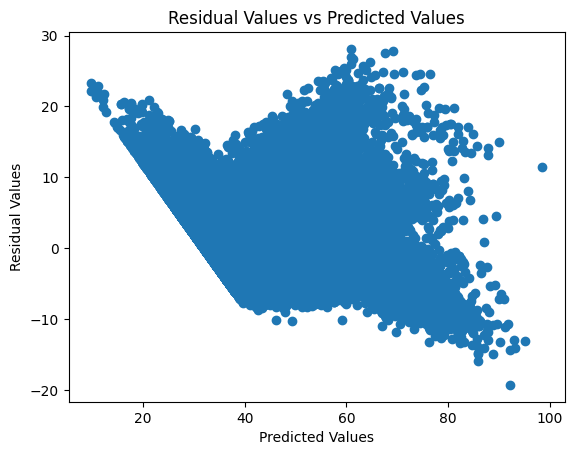

<Figure size 800x600 with 0 Axes>

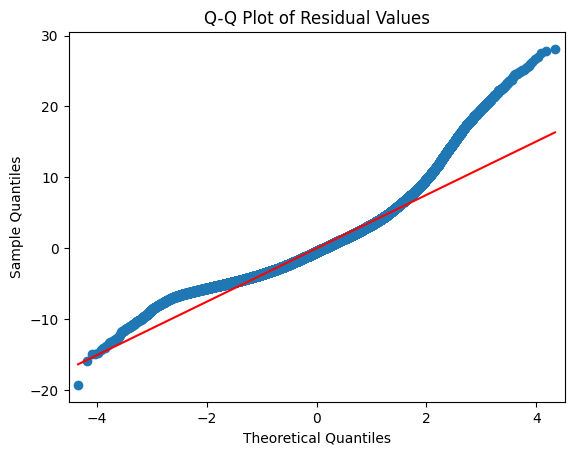

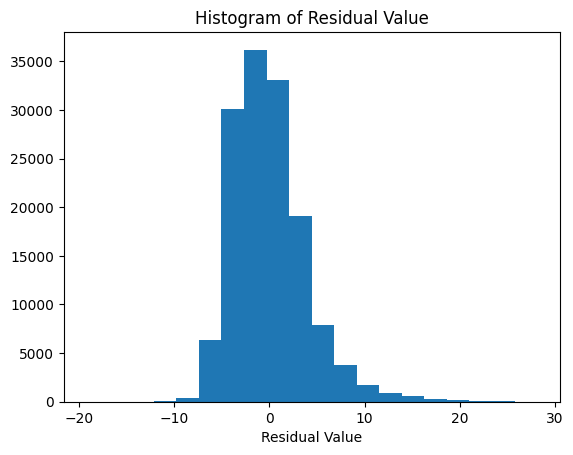

In [143]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
y_pred = final_model_lr.predict(X_train[selected_features])
residuals_value = y_train - y_pred

# Plot residuals value vs predicted values
plt.scatter(y_pred, residuals_value)
plt.xlabel('Predicted Values')
plt.ylabel('Residual Values')
plt.title('Residual Values vs Predicted Values')
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_value, line='r')
plt.title('Q-Q Plot of Residual Values')
plt.show()

# Plot histogram of residuals
plt.hist(residuals_value, bins=20)
plt.xlabel('Residual Value')
plt.title('Histogram of Residual Value')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [144]:
# Compare the scaled vs unscaled features used in the final model
selected_coef = final_model_lr.coef_
print("Scaled Coefficients:")
for feature, coef in zip(selected_features, selected_coef):
    print(f"{feature}: {coef}")

Scaled Coefficients:
order_protocol: -0.7366134386608877
subtotal: 2.39772835558892
num_distinct_items: 0.9248412295430334
max_item_price: 0.652921597677858
total_onshift_dashers: -12.026473340248462
total_busy_dashers: -4.606793941462212
total_outstanding_orders: 18.67042143910953
distance: 4.16547067791819


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [145]:
# Analyze the effect of a unit change in a feature, say 'total_items'
feature_index = selected_features.tolist().index('total_outstanding_orders')
scaled_coefficient = final_model_lr.coef_[feature_index]
unscaled_coefficient = scaled_coefficient / scaler.scale_[feature_index]

print(f"Effect of a unit change in total_outstanding_orders:")
print(f"  - Scaled Coefficient: {scaled_coefficient}")
print(f"  - Unscaled Coefficient: {unscaled_coefficient}")
print(f"  - Interpretation (Unscaled): For a one-unit increase in total_outstanding_orders, ")
print(f"     the predicted 'time_taken' is expected to change by {unscaled_coefficient} units (e.g., minutes).")

feature_index = selected_features.tolist().index('total_onshift_dashers')
scaled_coefficient = final_model_lr.coef_[feature_index]
unscaled_coefficient = scaled_coefficient / scaler.scale_[feature_index]
print()
print(f"Effect of a unit change in total_onshift_dashers:")
print(f"  - Scaled Coefficient: {scaled_coefficient}")
print(f"  - Unscaled Coefficient: {unscaled_coefficient}")
print(f"  - Interpretation (Unscaled): For a one-unit increase in total_onshift_dashers, ")
print(f"     the predicted 'time_taken' is expected to change by {unscaled_coefficient} units (e.g., minutes).")


Effect of a unit change in total_outstanding_orders:
  - Scaled Coefficient: 18.67042143910953
  - Unscaled Coefficient: 0.3552192723345771
  - Interpretation (Unscaled): For a one-unit increase in total_outstanding_orders, 
     the predicted 'time_taken' is expected to change by 0.3552192723345771 units (e.g., minutes).

Effect of a unit change in total_onshift_dashers:
  - Scaled Coefficient: -12.026473340248462
  - Unscaled Coefficient: -0.3492660995832692
  - Interpretation (Unscaled): For a one-unit increase in total_onshift_dashers, 
     the predicted 'time_taken' is expected to change by -0.3492660995832692 units (e.g., minutes).


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>
There are two categorical values : store_primary_category and order_protocol.

We might say that orders from fast-food restaurants tend to have shorter delivery times compared to other types.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size = 0.2 means that 20% of the data will be reserved for testing the model's performance, ensuring a robust evaluation on unseen data



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>total_outstanding_orders



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Used box plots to visualize the features and identify the outliers. Used IQR method to define lower and upper bounds for identifying outliers and removed them.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>total_outstanding_orders, total_onshift_dashers, total_busy_dashers



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. It is a statistical method used in data science and machine learning for predictive analysis.
The independent variable is also the predictor or explanatory variable that remains unchanged due to the change in other variables. However, the dependent variable changes with fluctuations in the independent variable. The regression model predicts the value of the dependent variable, which is the response or outcome variable being analyzed or studied.
Linear regression is a popular statistical tool used in data science and many advantages as :
Easy implementation, Interpretability, Scalability, Optimal for online settings





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
Linear (Simple) Regression: Models the relationship between one dependent and one independent variable. It is simpler to deal with one relationship.
Equation - Y = C0 + C1X + e

Multiple Regression : Models the relationship between one dependent and two or more independent variables. More complex due to multiple relationships.
Equation : Y = C0 + C1X1 + C2X2 + C3X3 + ….. + CnXn + e




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In linear regression, the cost function quantifies the difference between predicted values and actual values, it measures how well the model is performing. The goal is to minimise the cost function, which in turn improves the model's accuracy and the reliability of its predictions.
Most common and widely used algorithms for minimizing the cost function is gradient descent. This iterative process adjusts the model's parameters in the direction that reduces the cost.





---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>
Overfitting: It occurs when a model learns the training data too well, including noise and irrelevant details, resulting in high accuracy on the training set but poor generalization to new data.

Underfitting: It happens when a model is too simple and fails to capture the underlying patterns in the data, leading to poor performance on both training and testing sets.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots help us to determine whether a linear model is appropriate in modeling the given data. Residual analysis is a crucial diagnostic technique in regression analysis to evaluate the validity of model assumptions and assess the adequacy of the fitted model. It involves examining the residuals, which are the differences between the observed values and the predicted values from the regression model.